In [23]:
import fitbit
import datetime
from oauthlib.oauth2 import LegacyApplicationClient
from requests_oauthlib import OAuth2Session

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [14]:
# OAuth2セッションを作成
auth = OAuth2Session(client_id, token={
    'access_token': access_token,
    'refresh_token': refresh_token,
    'token_type': 'Bearer',
    'expires_in': '-30',
    'expires_at': '-30'
}, client=LegacyApplicationClient(client_id))

# Fitbitクライアントを作成
client = fitbit.Fitbit(client_id,
                       client_secret,
                       oauth2=True,
                       access_token=access_token,
                       refresh_token=refresh_token,
                       system='en_GB')

In [15]:
# 睡眠データを取得
start_date = datetime.date(2023, 7, 30)
end_date = start_date + datetime.timedelta(days=7)
sleep = client.get_sleep(date=start_date)

In [16]:
sleep

{'sleep': [{'awakeCount': 1,
   'awakeDuration': 3,
   'awakeningsCount': 15,
   'dateOfSleep': '2023-07-30',
   'duration': 19200000,
   'efficiency': 49,
   'endTime': '2023-07-30T05:21:30.000',
   'isMainSleep': True,
   'logId': 42232788154,
   'minuteData': [{'dateTime': '00:01:00', 'value': '2'},
    {'dateTime': '00:02:00', 'value': '2'},
    {'dateTime': '00:03:00', 'value': '2'},
    {'dateTime': '00:04:00', 'value': '2'},
    {'dateTime': '00:05:00', 'value': '2'},
    {'dateTime': '00:06:00', 'value': '2'},
    {'dateTime': '00:07:00', 'value': '2'},
    {'dateTime': '00:08:00', 'value': '2'},
    {'dateTime': '00:09:00', 'value': '2'},
    {'dateTime': '00:10:00', 'value': '2'},
    {'dateTime': '00:11:00', 'value': '2'},
    {'dateTime': '00:12:00', 'value': '2'},
    {'dateTime': '00:13:00', 'value': '2'},
    {'dateTime': '00:14:00', 'value': '1'},
    {'dateTime': '00:15:00', 'value': '1'},
    {'dateTime': '00:16:00', 'value': '1'},
    {'dateTime': '00:17:00', 'value'

## 2週間分のデータ取得

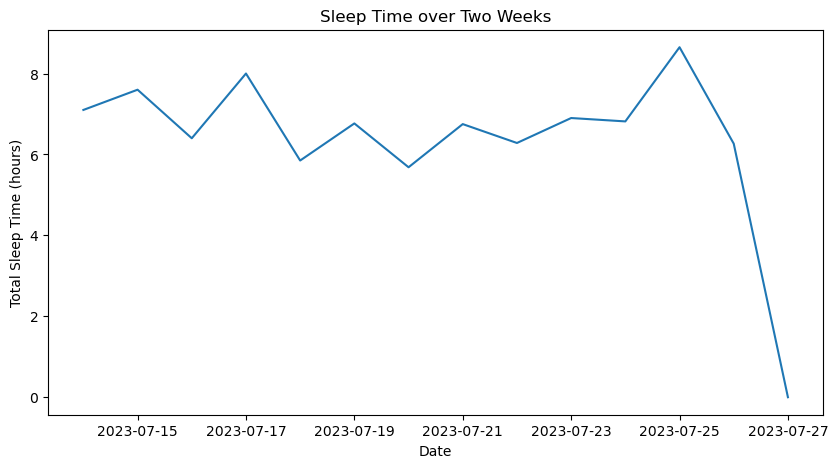

In [17]:
# 睡眠データを取得
start_date = datetime.date(2023, 7, 14)
end_date = start_date + datetime.timedelta(days=14)

dates = []
total_sleep_times = []

for day in (start_date + datetime.timedelta(n) for n in range((end_date-start_date).days)):
    sleep = client.get_sleep(date=day)
    dates.append(day)
    total_sleep_time = sum([sl['duration'] for sl in sleep['sleep']]) / 3600000  # ms to hours
    total_sleep_times.append(total_sleep_time)

# 睡眠データを可視化
plt.figure(figsize=(10, 5))
plt.plot(dates, total_sleep_times)
plt.xlabel('Date')
plt.ylabel('Total Sleep Time (hours)')
plt.title('Sleep Time over Two Weeks')
plt.show()

## code interpreter

In [18]:
import json

file_path = "/home/tsu-nera/Downloads/Takeout/Fitbit/Global Export Data/sleep-2023-07-15.json"

# Load the json file
with open(file_path) as file:
    data = json.load(file)

# Let's print the first record to understand the structure of the data
data[0]

{'logId': 42232788154,
 'dateOfSleep': '2023-07-30',
 'startTime': '2023-07-30T00:01:00.000',
 'endTime': '2023-07-30T05:21:30.000',
 'duration': 19200000,
 'minutesToFallAsleep': 0,
 'minutesAsleep': 275,
 'minutesAwake': 45,
 'minutesAfterWakeup': 0,
 'timeInBed': 320,
 'efficiency': 49,
 'type': 'stages',
 'infoCode': 0,
 'logType': 'auto_detected',
 'levels': {'summary': {'deep': {'count': 2,
    'minutes': 73,
    'thirtyDayAvgMinutes': 62},
   'wake': {'count': 18, 'minutes': 45, 'thirtyDayAvgMinutes': 45},
   'light': {'count': 20, 'minutes': 155, 'thirtyDayAvgMinutes': 220},
   'rem': {'count': 6, 'minutes': 47, 'thirtyDayAvgMinutes': 81}},
  'data': [{'dateTime': '2023-07-30T00:01:00.000',
    'level': 'wake',
    'seconds': 540},
   {'dateTime': '2023-07-30T00:10:00.000', 'level': 'light', 'seconds': 360},
   {'dateTime': '2023-07-30T00:16:00.000', 'level': 'deep', 'seconds': 2610},
   {'dateTime': '2023-07-30T00:59:30.000', 'level': 'light', 'seconds': 1560},
   {'dateTime':

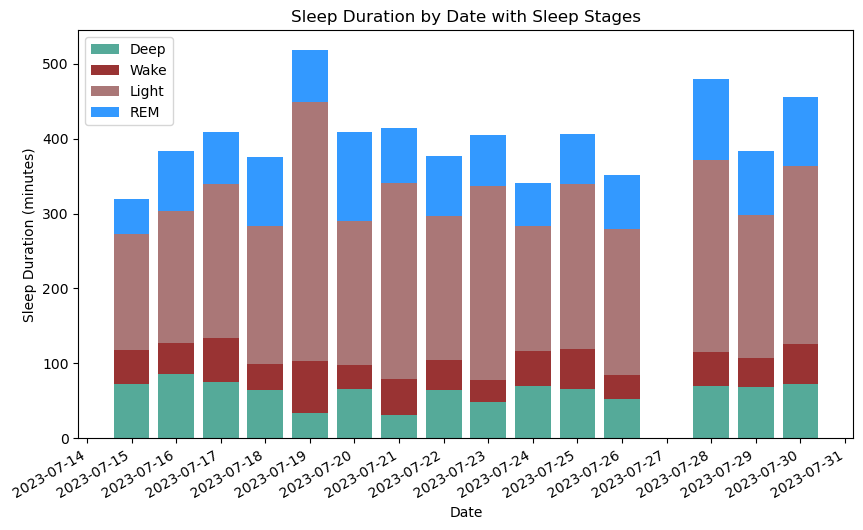

In [24]:
# Create a DataFrame for the sleep duration
duration_df = pd.DataFrame({'dateOfSleep': [record['dateOfSleep'] for record in data],
                            'minutesAsleep': [record['minutesAsleep'] for record in data]})

# Convert string date to datetime
duration_df['dateOfSleep'] = pd.to_datetime(duration_df['dateOfSleep'])

# Sort by date
duration_df = duration_df.sort_values('dateOfSleep')


# Add columns for each sleep stage duration
duration_df['deep'] = [record['levels']['summary']['deep']['minutes'] for record in data]
duration_df['wake'] = [record['levels']['summary']['wake']['minutes'] for record in data]
duration_df['light'] = [record['levels']['summary']['light']['minutes'] for record in data]
duration_df['rem'] = [record['levels']['summary']['rem']['minutes'] for record in data]

# Plot sleep duration by date with sleep stage proportions
plt.figure(figsize=(10, 6))
plt.bar(duration_df['dateOfSleep'], duration_df['deep'], label='Deep', color='#5A9')
plt.bar(duration_df['dateOfSleep'], duration_df['wake'], bottom=duration_df['deep'], label='Wake', color='#933')
plt.bar(duration_df['dateOfSleep'], duration_df['light'], bottom=duration_df['deep'] + duration_df['wake'], label='Light', color='#A77')
plt.bar(duration_df['dateOfSleep'], duration_df['rem'], bottom=duration_df['deep'] + duration_df['wake'] + duration_df['light'], label='REM', color='#39F')
plt.title('Sleep Duration by Date with Sleep Stages')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (minutes)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format x-axis label to year-month-day
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # rotate x-axis labels
plt.legend(loc='upper left')
plt.show()